# Patient Risk Modeling for Heart Disease Risk


## Problem Context

- About 655,000 Americans die from heart disease each year—that’s 1 in every 4 deaths.
- One person dies every 36 seconds in the United States from cardiovascular disease
- Coronary heart disease is the most common type of heart disease, killing 365,914 people in 2017
- Heart disease costs the United States about $219 billion each year from 2014 to 2015.This includes the cost of health care services, medicines, and lost productivity due to death.
- Common Causes of some sort of heart disease
    - Overweight/Obesity
    - Diabetes
    - High Blood Pressure
    - High Cholesterol
    - Smoking

Predictive models play a crucial role in the healthcare sector, providing a tool to identify high-risk patients, predict disease progression, and assist in the decision-making process for personalized treatment plans. In this notebook, we will focus on creating a predictive model for heart disease risk. The risk model can support clinicians in diagnosing potential heart diseases earlier, thereby increasing the chance of effective treatment and improving the overall patient care process.

## Dataset

The dataset used for this analysis is taken from the UCI Machine Learning Repository. Specifically, we use the Cleveland Heart Disease dataset, which is one of the most widely used datasets for heart disease prediction. The dataset contains patient records and a number of predictors relating to their medical history, lab test results, and lifestyle. 

## Data Dictionary

The dataset comprises the following attributes:

- **age**: Patient's age in years
- **sex**: Patient's sex (1 = male, 0 = female)
- **cp**: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
- **trestbps**: Resting blood pressure in mm Hg
- **chol**: Serum cholesterol in mg/dl
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **restecg**: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes, 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**: Thallium stress test result (3 = normal, 6 = fixed defect, 7 = reversible defect)
- **target**: Heart disease diagnosis (0 = no disease, 1 = disease)

Through exploratory data analysis, data preprocessing, feature importance analysis, and machine learning models implementation, we will attempt to create a predictive model for heart disease diagnosis.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_excel("/Users/Amanda/Downloads/Heart Disease.xlsx")

In [3]:
# Perform Exploratory Analysis
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca  thal  target  
0   0     6       0  
1   3     3       1  
2   2     7       1  
3   0     3       0  
4   0     3       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check percentage of missing values in each column
missing_percent = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:\n", missing_percent)

Missing values in each column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Percentage of missing values in each column:
 age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


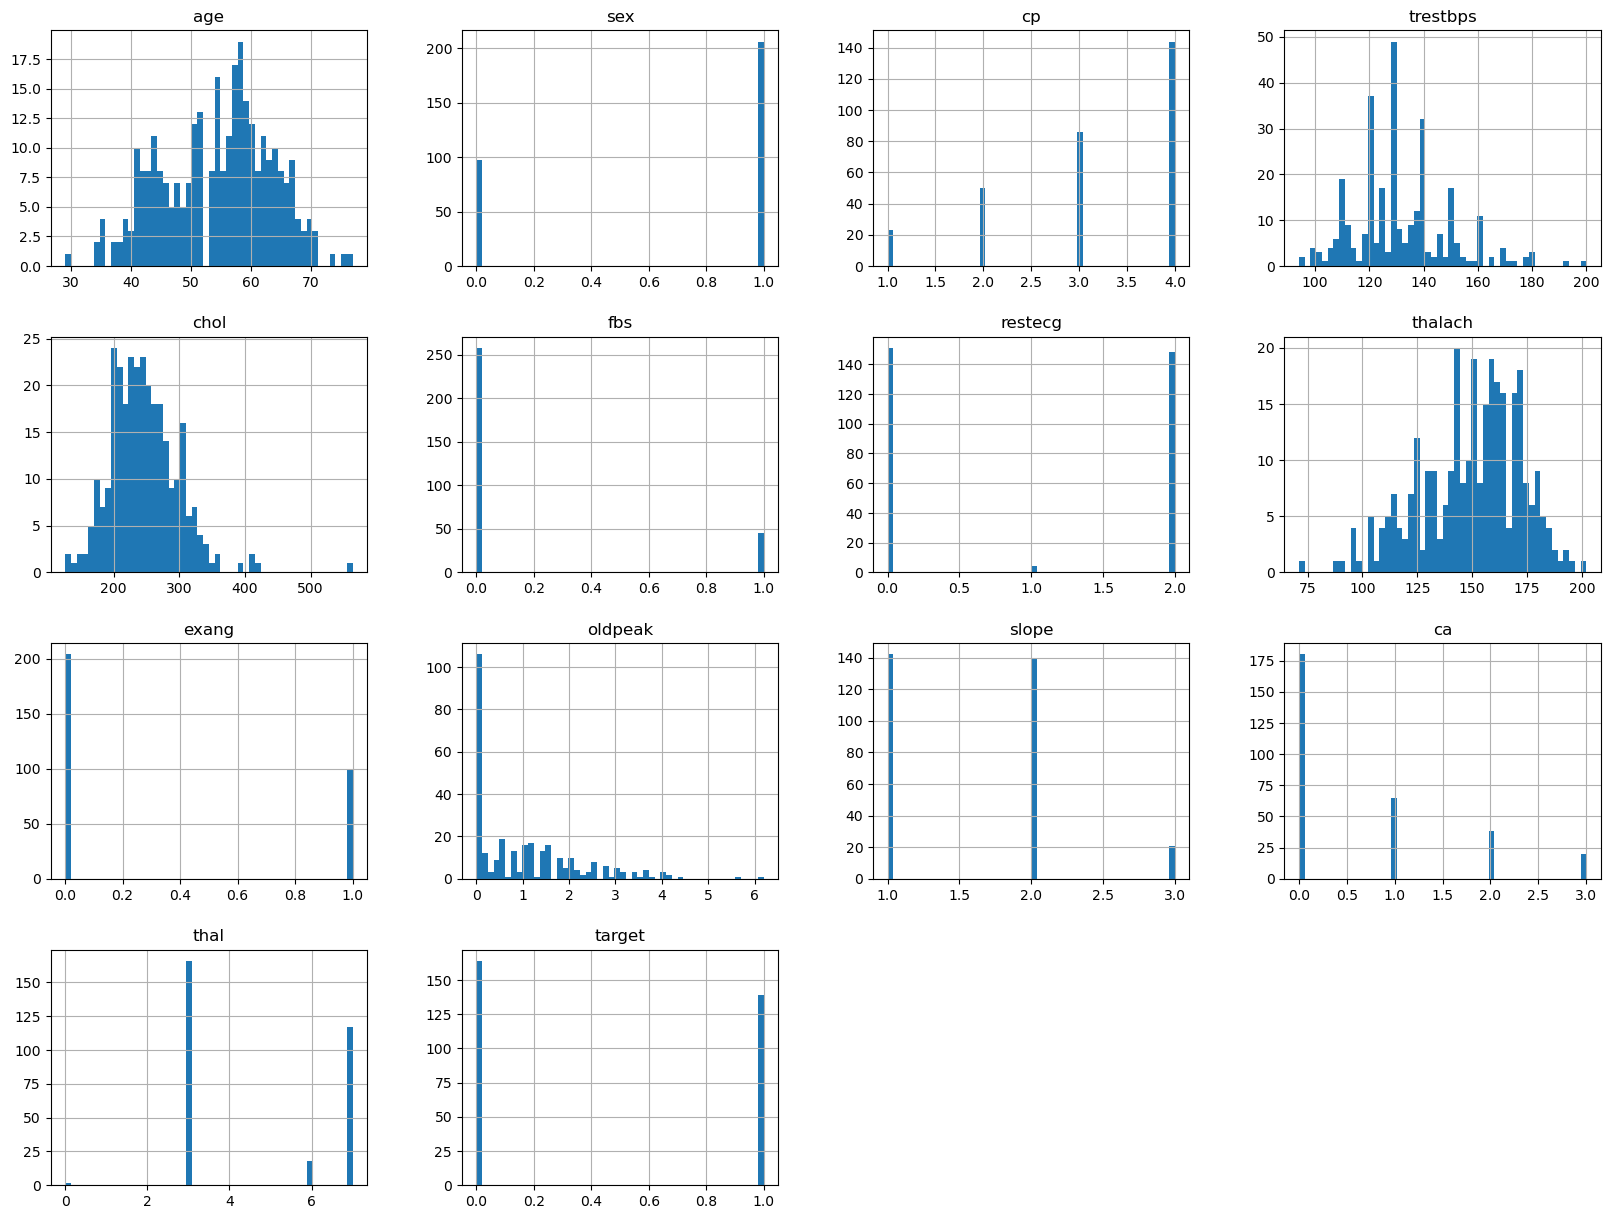

In [5]:
# Display histogram for each variable
df.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
# Split the data into two groups: with heart disease and without heart disease
group1 = df[df['target'] == 1]['age']
group2 = df[df['target'] == 0]['age']

# Perform t-test
t_stat, p_val = stats.ttest_ind(group1, group2)

print("T statistic: ", t_stat)
print("P value: ", p_val)

# Check the p-value
if p_val < 0.05:
    print("The difference in mean age between the groups is statistically significant.")
else:
    print("The difference in mean age between the groups is not statistically significant.")

T statistic:  3.971100226293655
P value:  8.955636917529706e-05
The difference in mean age between the groups is statistically significant.


In [7]:
# Perform one-way ANOVA
F_stat, p_val = stats.f_oneway(df[df['cp'] == 1]['age'], 
                               df[df['cp'] == 2]['age'], 
                               df[df['cp'] == 3]['age'], 
                               df[df['cp'] == 4]['age'])

print("F statistic: ", F_stat)
print("P value: ", p_val)

# Check the p-value
if p_val < 0.05:
    print("There is a significant difference in mean age across different types of chest pain.")
else:
    print("There is no significant difference in mean age across different types of chest pain.")

F statistic:  3.363527800130518
P value:  0.01907804944707371
There is a significant difference in mean age across different types of chest pain.


In [8]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['target'])

# Perform Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic: ", chi2)
print("P value: ", p_val)

# Check the p-value
if p_val < 0.05:
    print("There is a significant relationship between sex and target.")
else:
    print("There is no significant relationship between sex and target.")

Chi-square statistic:  22.042560606155472
P value:  2.666712348180942e-06
There is a significant relationship between sex and target.


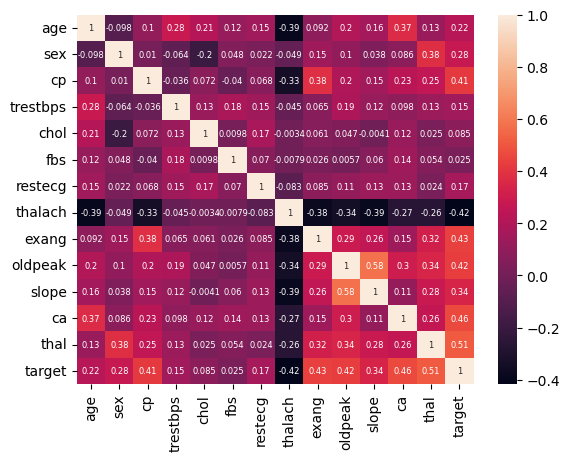

In [9]:
# Correlation matrix visualization
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 6})
plt.show()

In [10]:
# Feature Importance using Random Forest
rf = RandomForestClassifier()
rf.fit(df.iloc[:,:-1], df.iloc[:,-1])
print("Feature importance: ", rf.feature_importances_)

Feature importance:  [0.08940341 0.0303275  0.13310808 0.07601363 0.0756378  0.01039462
 0.02198517 0.11463897 0.05164217 0.11736668 0.05360055 0.10454923
 0.1213322 ]


In [11]:
# Data Preprocessing
# Assuming the target column is named 'target'
columns_to_drop = ['chol','fbs','target']
X = df.drop(columns_to_drop, axis=1)
y = df['target']

In [12]:
# Define the preprocessing steps using ColumnTransformer if needed
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), X.columns),
    ])

In [13]:
# Split into 80-20 Train Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('mlp', MLPClassifier())
])

In [15]:
# Specify a grid for hyperparameter tuning
param_grid = {
    'mlp__hidden_layer_sizes': [(30,30,30), (50,50,50), (50,100,50)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
}

This code sets up a grid of hyperparameters to tune the MLPRegressor. This process is known as hyperparameter tuningThe GridSearchCV will try all combinations of these hyperparameters to find the best ones.

In [16]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)

In [17]:
# Fit the model
grid_search.fit(X_train, y_train)

/Users/Amanda/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Amanda/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Amanda/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Amanda/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Amanda/anaconda3/lib/pyth

/Users/Amanda/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Amanda/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Amanda/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Amanda/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Amanda/anaconda3/lib/pyth

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object'))])),
                                       ('mlp', MLPClassifier())]),
             param_grid={'mlp__activation': ['tanh', 'relu'],
                         'mlp__hidden_layer_sizes': [(30, 30, 30), (50, 50, 50),
                                                     (50, 100, 50)],
                         'mlp__solver': ['sgd', 'adam']})

In [18]:
# Display the best parameters
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (50, 50, 50), 'mlp__solver': 'sgd'}


This line trains the model on the training data. GridSearchCV will automatically find the best hyperparameters from the grid that is specified.

In [19]:
# Make predictions
y_pred = grid_search.predict(X_test)

In [20]:
confus_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: \n", confus_matrix)

Confusion Matrix: 
 [[26  3]
 [ 4 28]]


Text(95.72222222222221, 0.5, 'True')

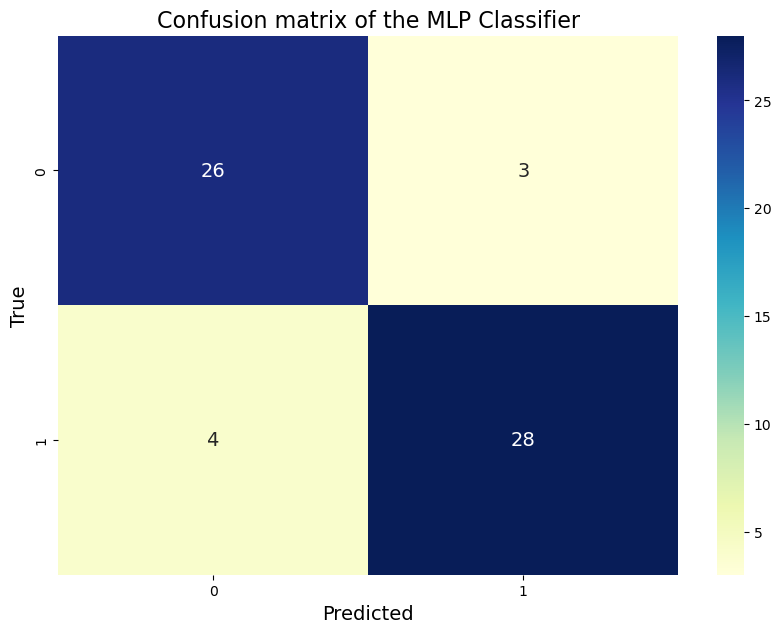

In [21]:
#graph matrix
plt.figure(figsize=(10,7))
sns.heatmap(confus_matrix, annot=True, cmap="YlGnBu", annot_kws={"size": 14})
plt.title('Confusion matrix of the MLP Classifier', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)

In [22]:
# Classification Report
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [23]:
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8852459016393442
